## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [107]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
## summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [109]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## insights and observations
- the dataset has missing values

In [110]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data cleaning

In [111]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [112]:
df['Reviews'].str.isnumeric().sum()

10840

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [114]:
df[-df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [115]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [116]:
df_copy=df.copy()

In [117]:
df_copy=df_copy.drop(df_copy.index[10472])

In [118]:
df_copy[-df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [119]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [120]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [121]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [122]:
#M==1000K

In [123]:
df_copy['Size'].isnull().sum()

0

In [124]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)

In [125]:
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [126]:
df_copy['Size']=df_copy['Size'].str.replace('.','')

In [127]:
df_copy['Size'].unique()

array(['19000', '14000', '87000', '25000', '28000', '56000', '29000',
       '33000', '31000', '12000', '20000', '21000', '37000', '27000',
       '55000', '17000', '39000', '42000', '70000', '23000', '60000',
       '61000', '46000', '92000', '52000', '11000', '24000', nan, '94000',
       '15000', '10000', '26000', '80000', '79000', '57000', '35000',
       '54000', '201', '36000', '86000', '16000', '34000', '89000',
       '38000', '32000', '18000', '22000', '45000', '98000', '90000',
       '67000', '30000', '71000', '74000', '64000', '82000', '99000',
       '49000', '95000', '50000', '59000', '13000', '73000', '68000',
       '40000', '72000', '91000', '23', '65000', '75000', '51000',
       '41000', '48000', '85000', '83000', '43000', '47000', '78000',
       '88000', '66000', '79', '84000', '118', '44000', '695', '62000',
       '18', '53000', '58000', '96000', '63000', '77000', '69000',
       '93000', '100000', '81000', '97000', '556', '526', '76000', '334',
       '232', '62

In [129]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [130]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [131]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [132]:
chars_to_rem=['+','$',',']
col=['Installs','Price']
for i in col:
    for j in chars_to_rem:
        df_copy[i]=df_copy[i].str.replace(j,'')

In [133]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [134]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [10]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [11]:
df_copy['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [12]:
df_copy['Size'].mean()

38967.97583378896

In [136]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [137]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [138]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

In [139]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [140]:
df_copy['year']=df_copy['Last Updated'].dt.year

In [141]:
df_copy['month']=df_copy['Last Updated'].dt.month
df_copy['date']=df_copy['Last Updated'].dt.day

In [142]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15


In [143]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  year            10840 non-null  int64         
 14  month           10840 non-null  int64         
 15  da

In [144]:
df_copy.to_csv('googleplay_cleaned.csv')

## EDA

In [8]:
import pandas as pd
df_copy=pd.read_csv('googleplay_cleaned.csv')
df_copy.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15


In [156]:
df_copy=df_copy.drop(columns='Unnamed: 0',axis=0)
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7,25
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7,6
10837,Parkinson Exercices FR,MEDICAL,NaN,3,95000.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1,20
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1,19


## check any duplicates in App

In [157]:
df_copy.duplicated('App').value_counts()

False    9659
True     1181
dtype: int64

In [158]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## observation
- the dataset has duplicates

In [6]:
df_copy=df_copy.drop_duplicates('App',keep='first')

NameError: name 'df_copy' is not defined

In [160]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15


In [161]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  year            9659 non-null   int64  
 14  month           9659 non-null   int64  
 15  date            9659 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


## Explore data

In [162]:
#df_copy[feature].dtype=='o'
#df_copy[feature].dtype!='o'
cat=[]
num=[]
for i in df_copy.columns:
    if df_copy[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)     
print('categiral features are ', cat)
print('numeriral features are ', num)

categiral features are  ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
numeriral features are  ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'year', 'month', 'date']


In [163]:
len(cat)

8

In [167]:
df_copy['Last Updated'].dtype

dtype('O')

In [164]:
len(num)

8

## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [171]:
## Proportion of count data on categorical columns
for col in cat:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('---------------------------')

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
---------------------------
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE            

In [172]:
df_copy['App'].value_counts(normalize=True)*100

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64

In [173]:
df_copy['year'].value_counts(normalize=True)*100

2018    65.058495
2017    18.573351
2016     8.065017
2015     4.648514
2014     2.101667
2013     1.118128
2012     0.269179
2011     0.155296
2010     0.010353
Name: year, dtype: float64

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

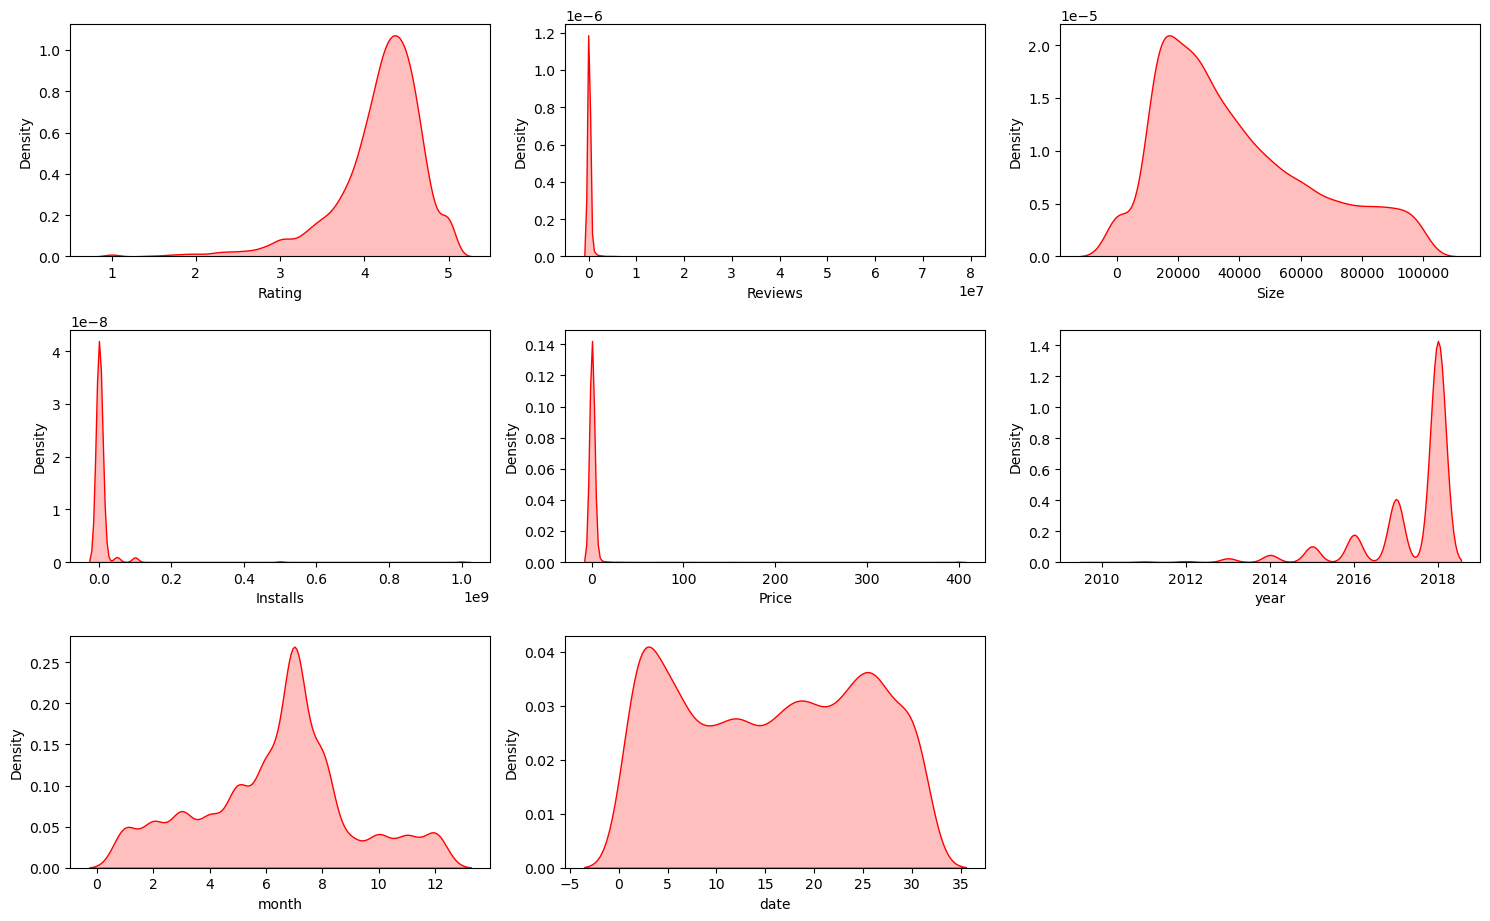

In [185]:
plt.figure(figsize=(15,15))
for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
#    sns.histplot(data=df_copy[i])
    sns.kdeplot(x=df_copy[num[i]],shade=True,color='r')
    plt.xlabel(num[i])
    plt.tight_layout()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

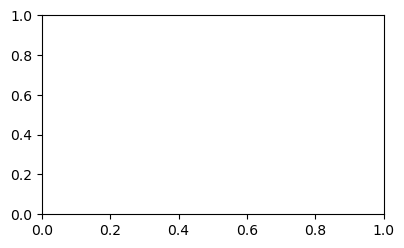

In [184]:
plt.figure(figsize=(15,15))
for i in range(0, len(cat)):
    plt.subplot(5,3,i+1)
#    sns.histplot(data=df_copy[i])
    sns.kdeplot(x=df_copy[cat[i]],shade=True,color='r')

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

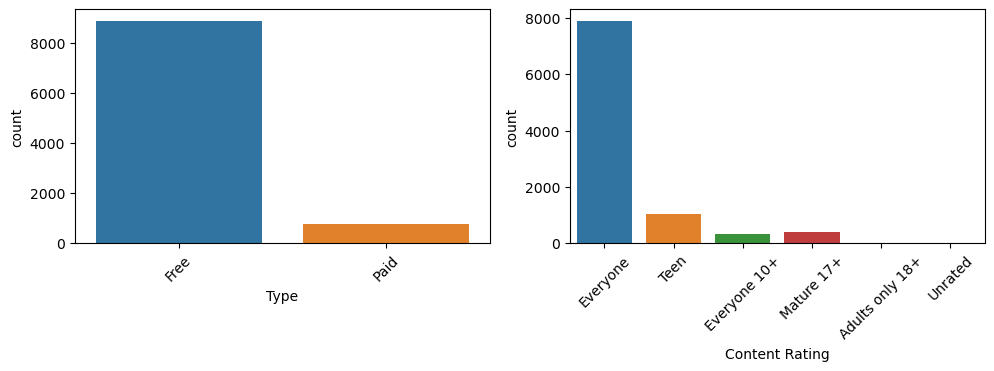

In [199]:
cat1=[ 'Type', 'Content Rating']
#cat1=['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
plt.figure(figsize=(15,15))
for i in range(0, len(cat1)):
    plt.subplot(5,3,i+1)
#    sns.histplot(data=df_copy[i])
    sns.countplot(x=df_copy[cat1[i]])
    plt.xlabel(cat1[i])
    plt.tight_layout()
    plt.xticks(rotation=45)

## Which is the most popular app category?

In [200]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15


([<matplotlib.patches.Wedge at 0x17e5a34fb50>,
 [Text(0.9104336566894639, 0.6173415236050882, 'ART_AND_DESIGN'),
  Text(0.07382504308689089, 1.0975198690744596, 'AUTO_AND_VEHICLES'),
  Text(-0.5405748494985929, 0.9580077411428227, 'BEAUTY'),
  Text(-0.8747084212420884, 0.6669971347825817, 'BOOKS_AND_REFERENCE'),
  Text(-1.0189000163431785, 0.41453921008255756, 'BUSINESS'),
  Text(-1.089898070570753, 0.1487353211787645, 'COMICS'),
  Text(-1.0935544195032258, -0.11890639841893609, 'COMMUNICATION'),
  Text(-1.0333215484057112, -0.3771559062250296, 'DATING'),
  Text(-0.9187816459638516, -0.6048473253970424, 'EDUCATION'),
  Text(-0.766286027556971, -0.7891804128150656, 'ENTERTAINMENT'),
  Text(-0.5866518957569848, -0.9305049990218945, 'EVENTS'),
  Text(-0.39407668469687074, -1.0269876175389474, 'FINANCE'),
  Text(-0.1983685041030802, -1.0819657742183468, 'FOOD_AND_DRINK'),
  Text(-0.00804985899824949, -1.0999705449556858, 'HEALTH_AND_FITNESS'),
  Text(0.1676770620781013, -1.0871450698287035

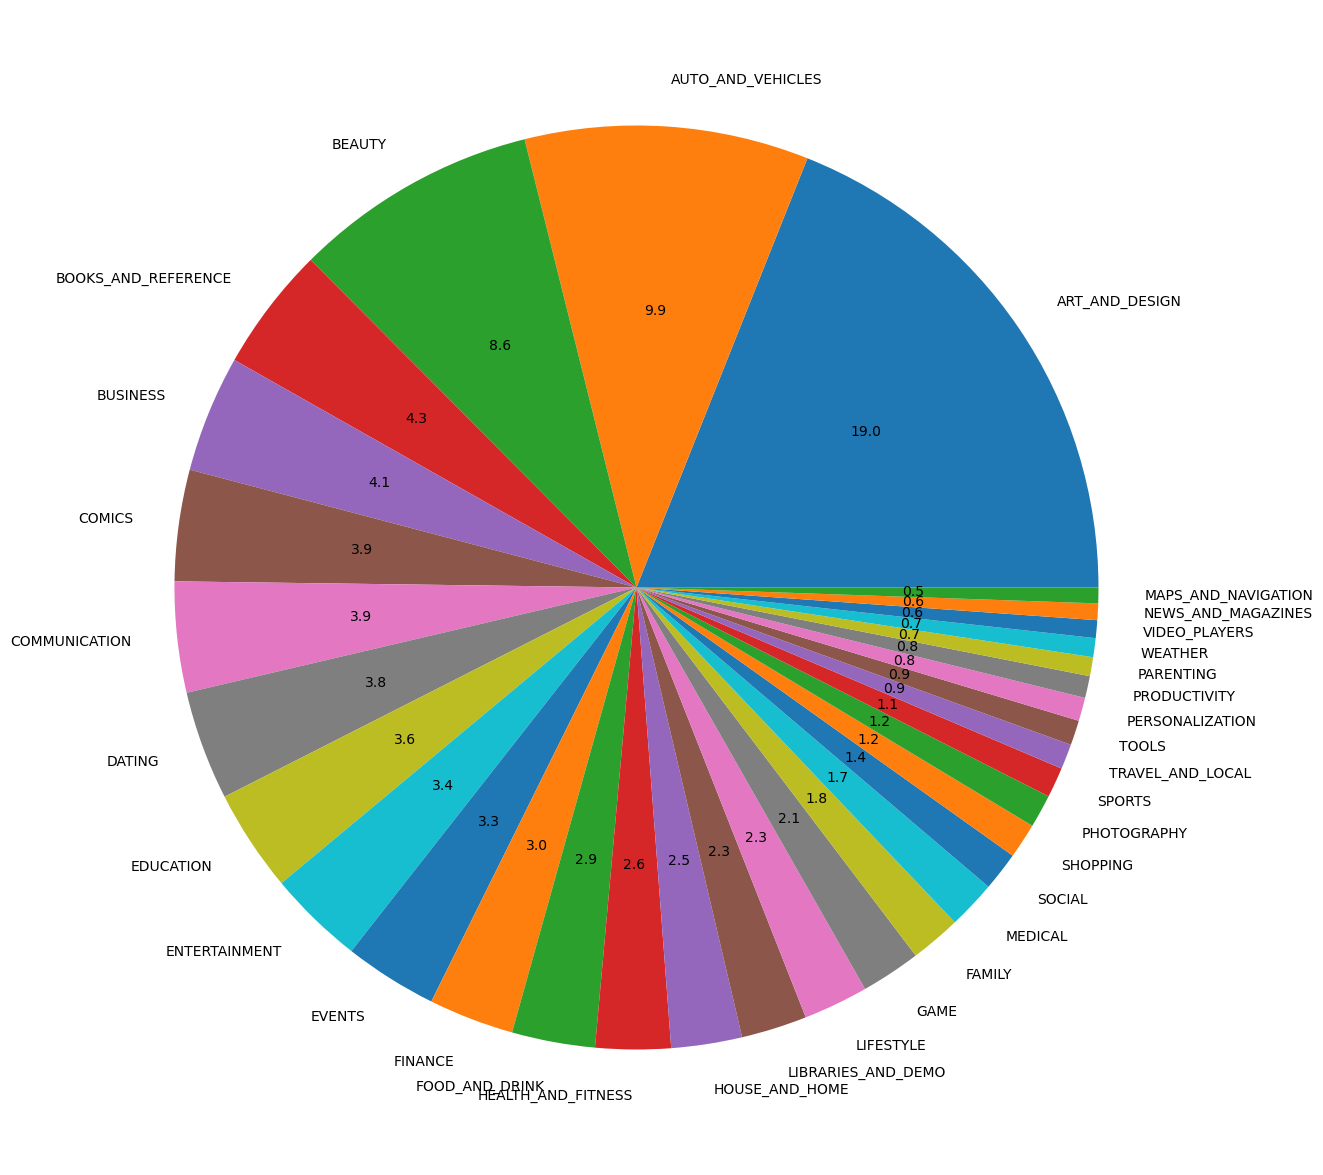

In [217]:
plt.figure(figsize=(15,15))
plt.pie(df_copy['Category'].value_counts(),autopct='%1.1f',labels=df_copy['Category'].unique())

In [218]:
df_copy['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

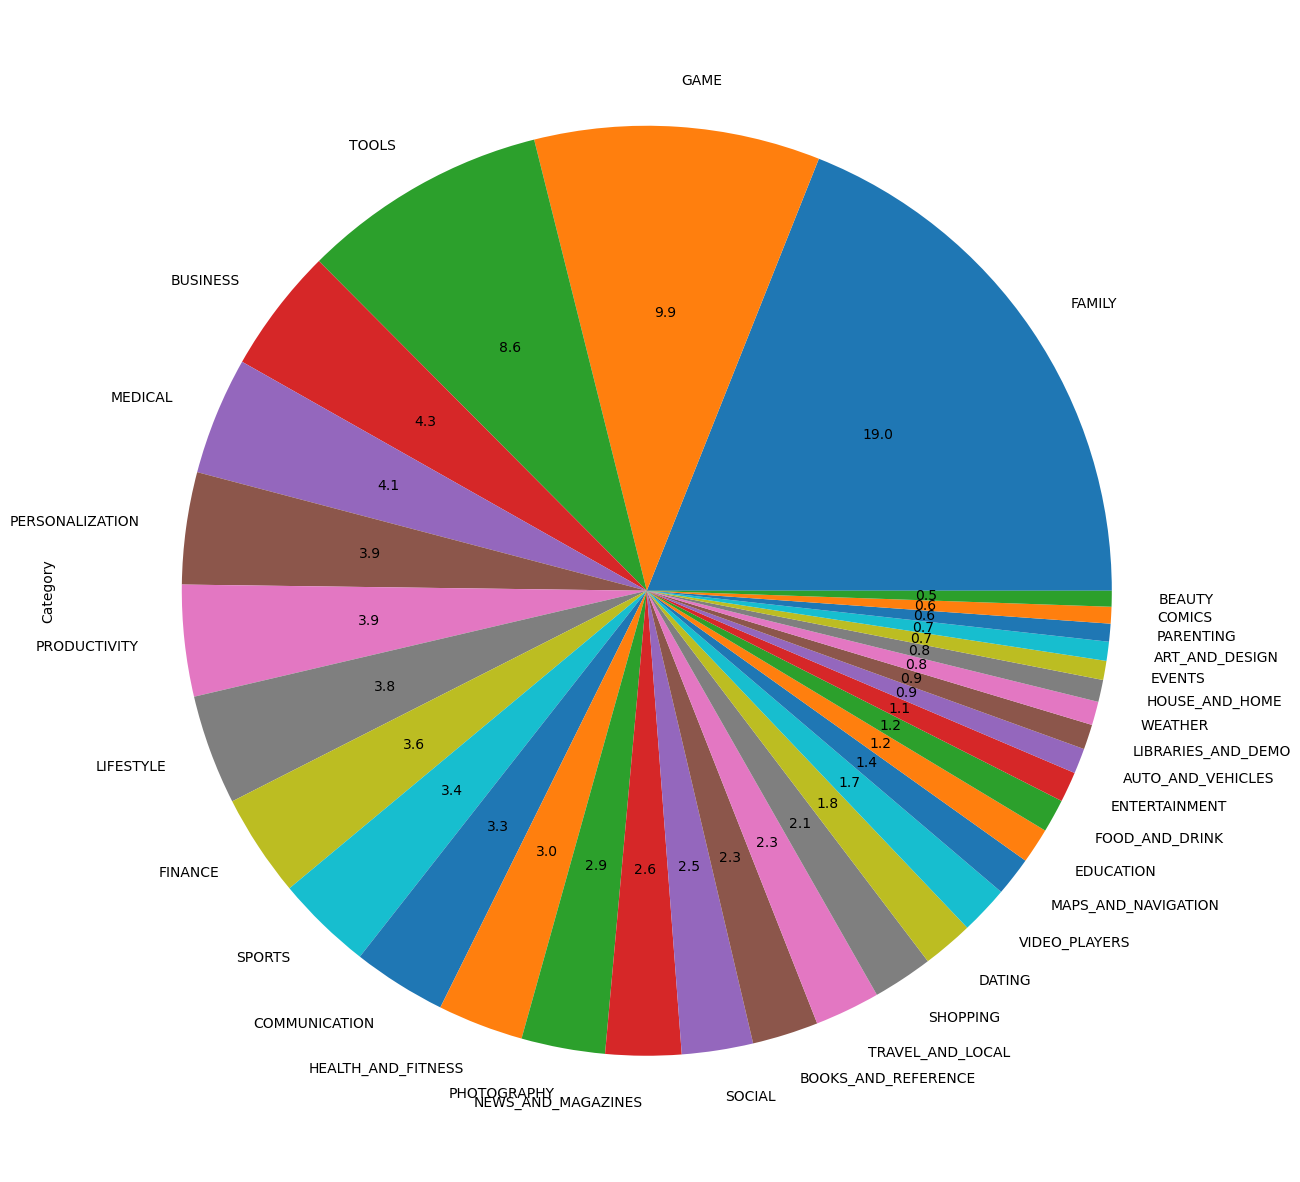

In [221]:
df_copy['Category'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

## Top 10 App Categories

In [245]:
category=pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

In [246]:
category[:10]

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


In [247]:
category.index[0:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object')

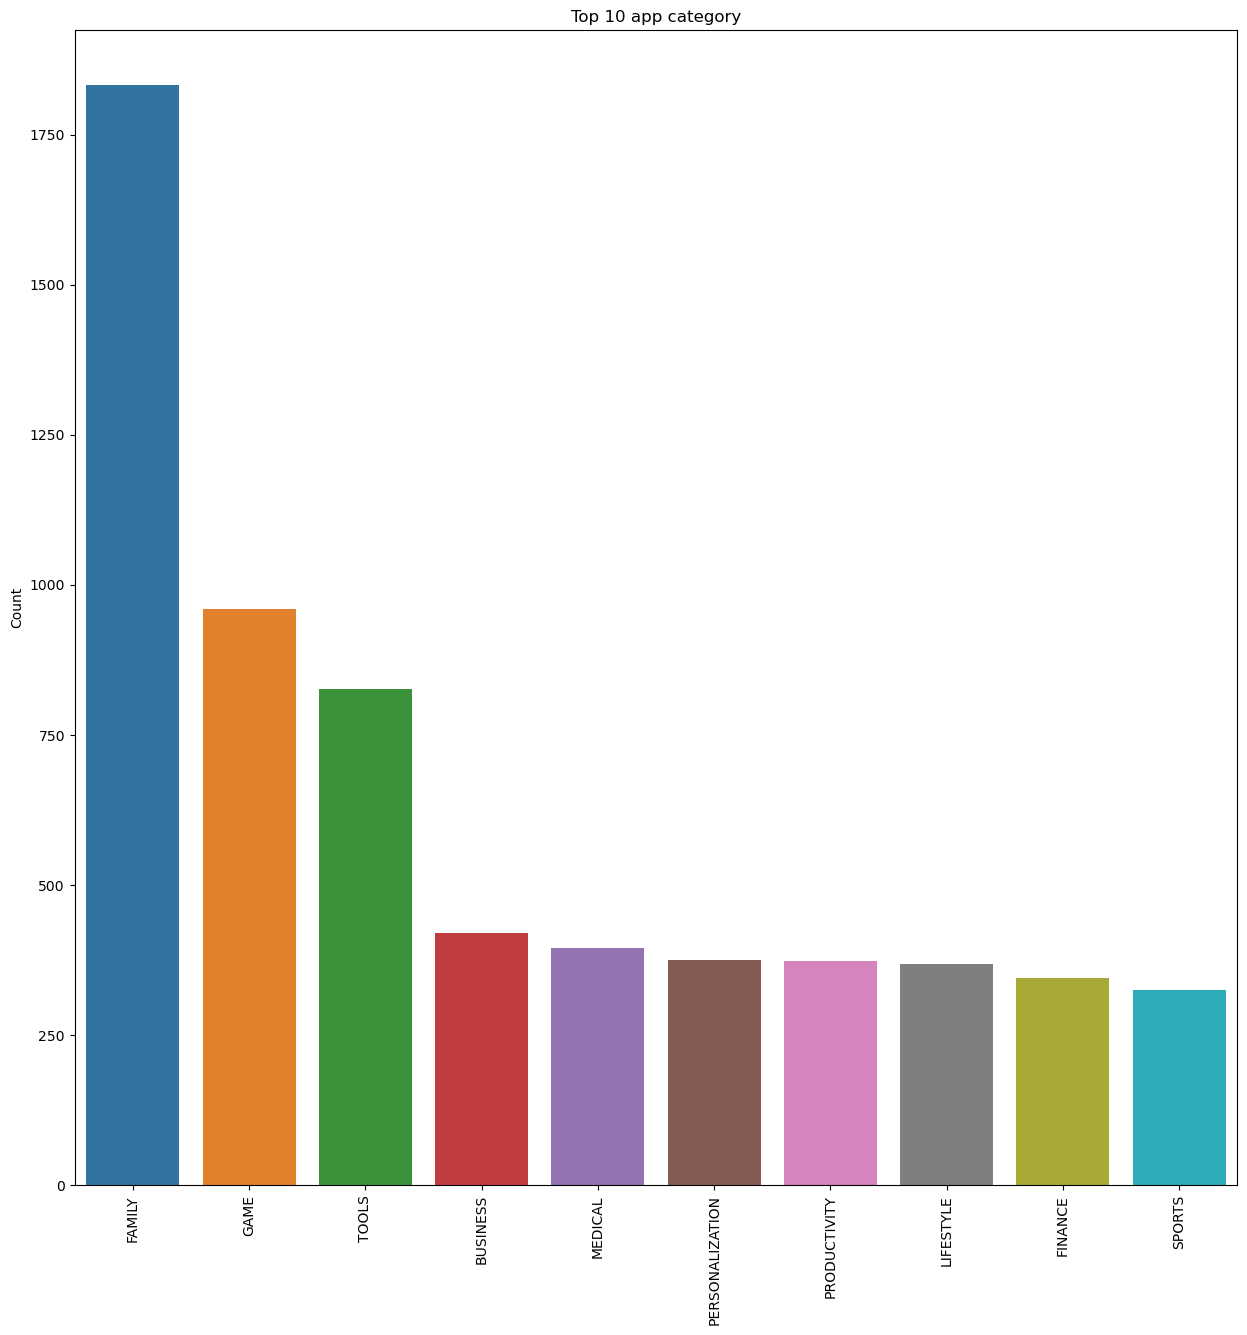

In [257]:
plt.figure(figsize=(15,15))
plt.title("Top 10 app category")
sns.barplot(data=category[:10],x=category.index[:10],y='Count')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

In [324]:
df_install=df_copy[['Category','Installs']]
df_install.head(50)

,Category,Installs
0,ART_AND_DESIGN,10000
1,ART_AND_DESIGN,500000
2,ART_AND_DESIGN,5000000
3,ART_AND_DESIGN,50000000
4,ART_AND_DESIGN,100000
5,ART_AND_DESIGN,50000
6,ART_AND_DESIGN,50000
7,ART_AND_DESIGN,1000000
8,ART_AND_DESIGN,1000000
9,ART_AND_DESIGN,10000


In [340]:
df_insta1=pd.DataFrame(df_install.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)).reset_index()
df_install_top10=df_insta1.head(10)
df_install_top10

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

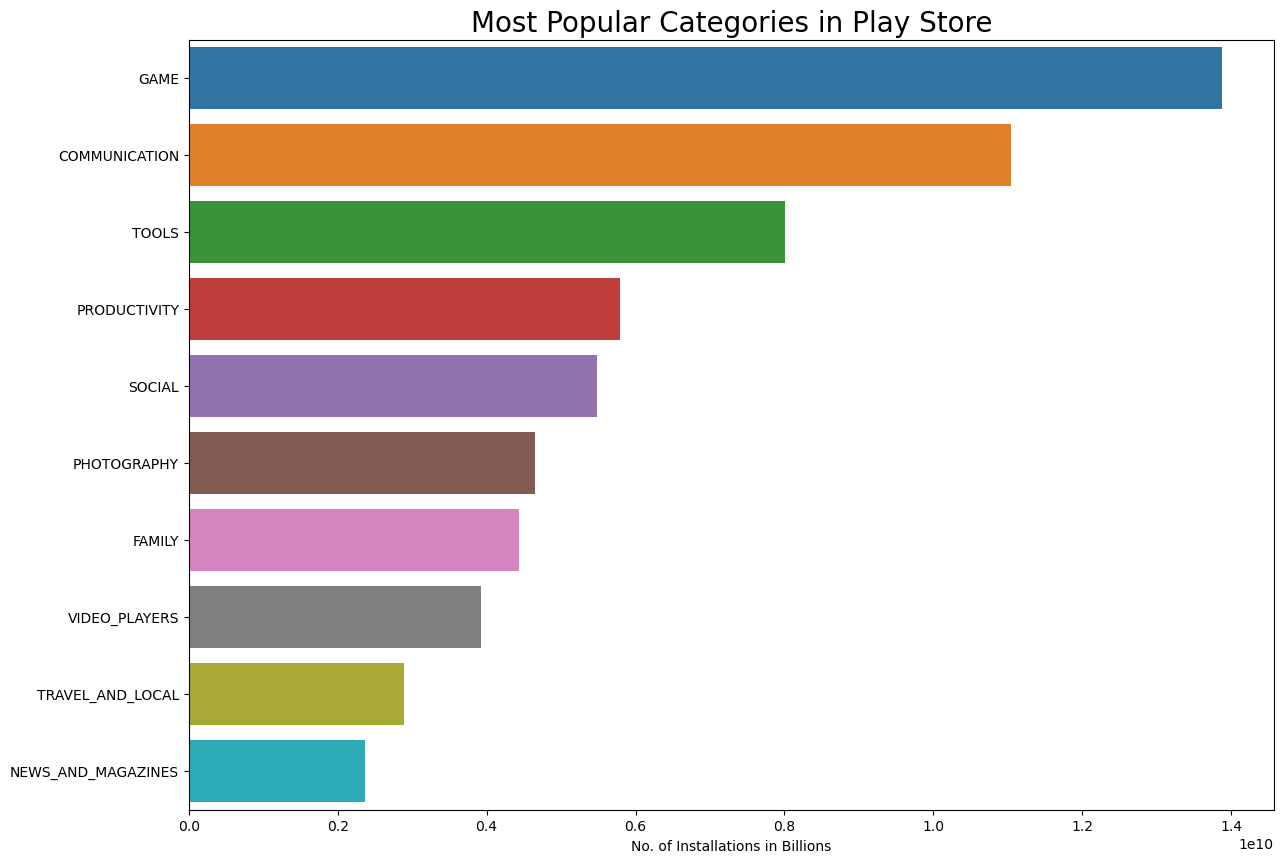

In [341]:
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df_install_top10 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

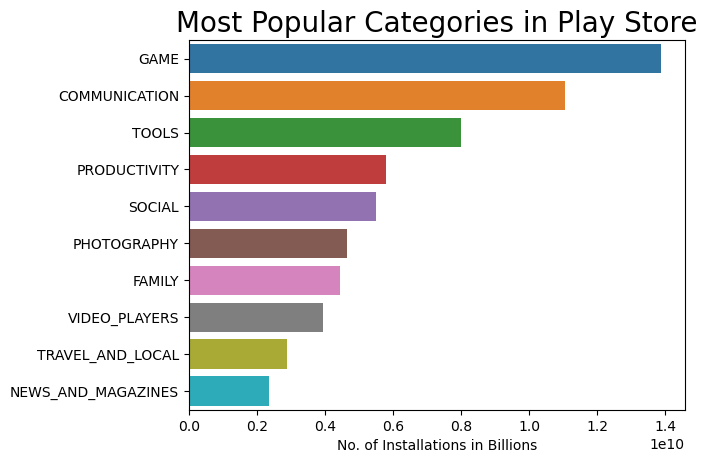

In [347]:
sns.barplot(x = 'Installs' , y = 'Category' , data = df_install_top10 )
plt.xlabel('No. of Installations in Billions')
plt.ylabel('')
plt.title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

In [348]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15


In [370]:
df_ACI=df_copy[['App','Category','Installs']]
df_ACI

,App,Category,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,10000
1,Coloring book moana,ART_AND_DESIGN,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,100000
...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,5000
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,100
10837,Parkinson Exercices FR,MEDICAL,1000
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,1000


In [387]:
df_install_top10[0:5]

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902


In [393]:
df_ACI[df_ACI['Category']=='GAME']

,App,Category,Installs
1653,ROBLOX,GAME,100000000
1654,Subway Surfers,GAME,1000000000
1655,Candy Crush Saga,GAME,500000000
1656,Solitaire,GAME,10000000
1657,Bubble Shooter,GAME,10000000
...,...,...,...
10790,Winter Wonderland,GAME,50000
10791,Soccer Clubs Logo Quiz,GAME,1000000
10792,Sid Story,GAME,500000
10802,Fatal Raid - No.1 Mobile FPS,GAME,1000000


In [395]:
df_ACI[df_ACI['Category']=='GAME'].sort_values(by='Installs',ascending=False)

,App,Category,Installs
1654,Subway Surfers,GAME,1000000000
1655,Candy Crush Saga,GAME,500000000
1661,Temple Run 2,GAME,500000000
1662,Pou,GAME,500000000
1722,My Talking Tom,GAME,500000000
...,...,...,...
10696,Mu.F.O.,GAME,1
5846,YAKALA AY,GAME,1
5917,Ra Ga Ba,GAME,1
6277,Bi-Tank Ads Free,GAME,1


In [424]:
df_ACI[df_ACI['Category']=='COMMUNICATION'].sort_values(by='Installs',ascending=False).head(20)

,App,Category,Installs
335,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
391,Skype - free IM & video calls,COMMUNICATION,1000000000
336,WhatsApp Messenger,COMMUNICATION,1000000000
338,Google Chrome: Fast & Secure,COMMUNICATION,1000000000
340,Gmail,COMMUNICATION,1000000000
341,Hangouts,COMMUNICATION,1000000000
342,Viber Messenger,COMMUNICATION,500000000
403,LINE: Free Calls & Messages,COMMUNICATION,500000000
371,Google Duo - High Quality Video Calls,COMMUNICATION,500000000
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,500000000


In [399]:
top4=['GAME','COMMUNICATION','TOOLS','PRODUCTIVITY','SOCIAL']

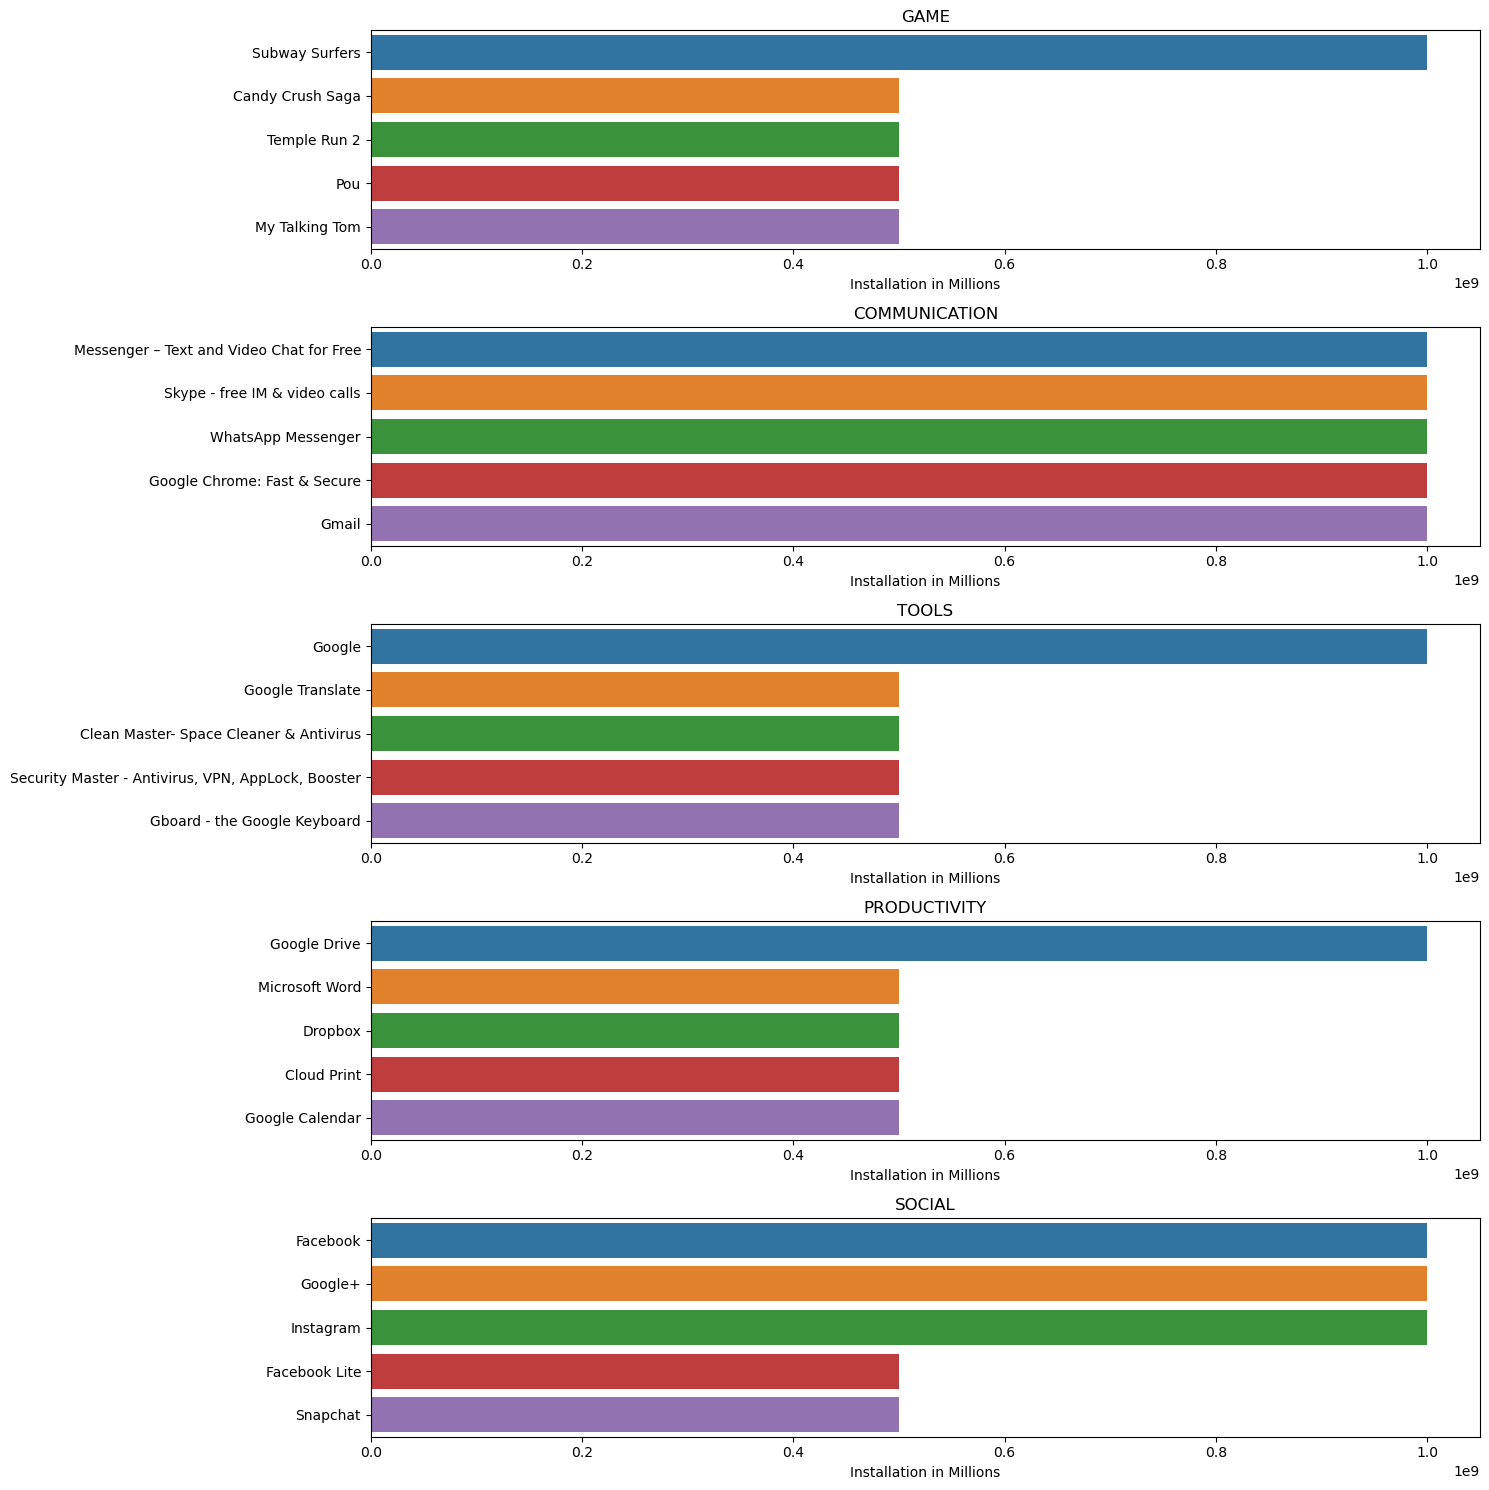

In [422]:
plt.figure(figsize=(15,15))
for i in range(0,len(top4)):
    plt.subplot(5,1,i+1)
    df_top4=df_ACI[df_ACI['Category']==top4[i]].sort_values(by='Installs',ascending=False)[0:5]
    sns.barplot(x = 'Installs' , y='App', data = df_top4 )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(top4[i])
plt.tight_layout()

In [ ]:
## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social apps are Fcebook, Google+ and Instagram.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

In [425]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15


In [427]:
df_AR=df_copy[['App','Rating']]

In [428]:
df_AR

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10835,Sya9a Maroc - FR,4.5
10836,Fr. Mike Schmitz Audio Teachings,5.0
10837,Parkinson Exercices FR,NaN
10838,The SCP Foundation DB fr nn5n,4.5


In [430]:
df_AR[df_AR['Rating']==5]

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
...,...,...
10720,Mad Dash Fo' Cash,5.0
10741,GKPB FP Online Church,5.0
10775,Monster Ride Pro,5.0
10819,Fr. Daoud Lamei,5.0


In [433]:
df_AR[df_AR['Rating']==5].count()

App       271
Rating    271
dtype: int64

## Result
- There are 271 five rated apps on Google Play store

In [9]:
df_copy.corr()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price,year,month,date
Unnamed: 0,1.000000,-0.129778,-0.115770,-0.054538,-0.133269,0.005424,-0.223728,-0.080024,-0.008249
Rating,-0.129778,1.000000,0.068141,0.048393,0.051355,-0.021903,0.137714,0.017254,-0.012508
Reviews,-0.115770,0.068141,1.000000,0.128560,0.643122,-0.009667,0.075537,0.045930,-0.030141
Size,-0.054538,0.048393,0.128560,1.000000,0.064016,-0.010737,0.168085,0.023556,0.004034
Installs,-0.133269,0.051355,0.643122,0.064016,1.000000,-0.011689,0.089368,0.056447,-0.053122
Price,0.005424,-0.021903,-0.009667,-0.010737,-0.011689,1.000000,-0.007897,0.006943,-0.008225
year,-0.223728,0.137714,0.075537,0.168085,0.089368,-0.007897,1.000000,-0.187306,-0.016433
month,-0.080024,0.017254,0.045930,0.023556,0.056447,0.006943,-0.187306,1.000000,-0.079856
date,-0.008249,-0.012508,-0.030141,0.004034,-0.053122,-0.008225,-0.016433,-0.079856,1.000000


In [4]:
df_copy

NameError: name 'df_copy' is not defined